In [1]:
import pandas as pd
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
mpl.rcParams['figure.dpi'] = 600

In [2]:
df = pd.read_excel("GSE120575.xlsx", index=1)

In [3]:
df.index = df['Unnamed: 0']
df = df.drop('Unnamed: 0', axis=1)
df

,Pre_P1,Post_P1,Post_P1_2,Pre_P2,Post_P2,Pre_P3,Post_P3,Post_P3_2,Pre_P4,Post_P4,...,Pre_P26,Pre_P27,Pre_P28,Post_P28,Post_P28_2,Pre_P29,Post_P30,Pre_P31,Pre_P33,Pre_P35
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
G1,0.436681,1.030928,7.932011,0.890208,1.328904,5.306122,0.000000,0.558659,4.501608,54.869359,...,57.057057,0.000000,1.186944,0.000000,0.000000,6.748466,1.355014,0.569801,13.274336,44.537815
G2,0.000000,1.030928,1.133144,1.186944,3.654485,0.000000,0.000000,0.000000,0.000000,1.425178,...,0.300300,0.000000,0.000000,0.000000,0.000000,1.226994,0.271003,0.854701,1.106195,1.260504
G3,0.873362,3.436426,1.416431,11.572700,1.993355,7.755102,8.356546,3.910615,31.832797,1.900238,...,3.903904,3.790087,0.890208,95.663957,25.000000,8.588957,16.531165,0.854701,0.000000,0.000000
G4,1.310044,0.687285,0.849858,0.296736,0.332226,1.224490,0.278552,1.955307,3.536977,1.900238,...,0.600601,2.332362,0.593472,0.000000,0.537634,0.000000,3.252033,1.139601,0.000000,0.000000
G5,58.078603,24.054983,1.133144,6.528190,10.299003,33.877551,28.969359,70.391061,1.286174,0.712589,...,21.321321,0.291545,18.100890,0.000000,0.268817,7.361963,1.355014,24.786325,0.000000,10.924370
G6,0.000000,3.780069,33.994334,15.133531,14.617940,0.000000,5.571031,0.279330,17.684887,0.950119,...,0.000000,55.102041,2.967359,0.813008,23.387097,22.085890,31.978320,1.139601,11.946903,0.840336
G7,6.986900,16.494845,11.898017,10.089021,13.953488,5.714286,12.813370,5.027933,2.893891,6.650831,...,8.108108,12.827988,21.958457,1.626016,26.881720,20.245399,15.447154,9.116809,6.415929,10.084034
G8,1.746725,5.498282,9.631728,5.934718,8.305648,16.734694,17.270195,3.072626,13.826367,4.275534,...,0.900901,12.827988,22.255193,0.542005,12.903226,14.110429,5.691057,0.854701,17.477876,10.924370
G9,27.074236,28.178694,12.464589,38.575668,33.887043,10.612245,15.041783,11.452514,4.501608,0.237530,...,0.600601,0.874636,2.670623,0.000000,0.268817,4.294479,2.439024,45.868946,0.221239,10.084034


In [4]:
d = {'G1': 'B-cells', 'G2': 'Plasma cells', 'G3': 'Monocytes/Macrophages', 'G4': 'Dendritic cells', 'G5': 'Lymphocytes',
    'G6': 'Exhausted CD8+ T-cells', 'G7': 'Regulatory T-cells', 'G8': 'Cytotoxicity', 'G9': 'Exhausted/HS CD8+ T-cells',
    'G10': 'Memory T-cells', 'G11': 'Lymphocytes exhausted/cell-cycle'}

In [5]:
df[[i for i in df.columns if 'Pre_' in i]]

,Pre_P1,Pre_P2,Pre_P3,Pre_P4,Pre_P6,Pre_P7,Pre_P8,Pre_P12,Pre_P15,Pre_P20,Pre_P24,Pre_P25,Pre_P26,Pre_P27,Pre_P28,Pre_P29,Pre_P31,Pre_P33,Pre_P35
Unnamed: 0,,,,,,,,,,,,,,,,,,,
G1,0.436681,0.890208,5.306122,4.501608,3.819444,13.315217,10.486891,0.606061,1.315789,1.238390,3.550296,0.000000,57.057057,0.000000,1.186944,6.748466,0.569801,13.274336,44.537815
G2,0.000000,1.186944,0.000000,0.000000,31.944444,0.000000,0.000000,0.303030,0.000000,3.405573,0.000000,0.000000,0.300300,0.000000,0.000000,1.226994,0.854701,1.106195,1.260504
G3,0.873362,11.572700,7.755102,31.832797,23.263889,0.000000,13.857678,17.272727,9.539474,10.835913,0.887574,0.000000,3.903904,3.790087,0.890208,8.588957,0.854701,0.000000,0.000000
G4,1.310044,0.296736,1.224490,3.536977,6.250000,0.000000,1.123596,4.242424,2.302632,0.928793,0.887574,0.000000,0.600601,2.332362,0.593472,0.000000,1.139601,0.000000,0.000000
G5,58.078603,6.528190,33.877551,1.286174,1.388889,7.336957,0.749064,0.303030,24.342105,0.619195,0.591716,29.919137,21.321321,0.291545,18.100890,7.361963,24.786325,0.000000,10.924370
G6,0.000000,15.133531,0.000000,17.684887,3.125000,9.239130,2.621723,13.636364,1.644737,30.340557,5.621302,4.582210,0.000000,55.102041,2.967359,22.085890,1.139601,11.946903,0.840336
G7,6.986900,10.089021,5.714286,2.893891,8.333333,18.206522,0.749064,6.666667,23.684211,10.835913,7.396450,6.738544,8.108108,12.827988,21.958457,20.245399,9.116809,6.415929,10.084034
G8,1.746725,5.934718,16.734694,13.826367,0.694444,9.239130,30.337079,48.484848,15.789474,8.049536,26.627219,5.929919,0.900901,12.827988,22.255193,14.110429,0.854701,17.477876,10.924370
G9,27.074236,38.575668,10.612245,4.501608,3.125000,7.336957,1.498127,0.606061,12.171053,3.715170,0.000000,46.630728,0.600601,0.874636,2.670623,4.294479,45.868946,0.221239,10.084034


In [6]:
pre = df[[i for i in df.columns if 'Pre_' in i]]

In [7]:
df[[i for i in df.columns if 'Post_' in i]]

,Post_P1,Post_P1_2,Post_P2,Post_P3,Post_P3_2,Post_P4,Post_P5,Post_P5_2,Post_P6,Post_P7,...,Post_P18,Post_P19,Post_P20,Post_P21,Post_P22,Post_P23,Post_P23_2,Post_P28,Post_P28_2,Post_P30
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
G1,1.030928,7.932011,1.328904,0.000000,0.558659,54.869359,0.684932,0.297619,2.922078,1.298701,...,46.778711,19.817073,3.072626,12.676056,0.384615,1.675978,1.933702,0.000000,0.000000,1.355014
G2,1.030928,1.133144,3.654485,0.000000,0.000000,1.425178,1.027397,0.297619,1.623377,0.000000,...,0.840336,0.304878,1.117318,26.291080,0.769231,0.558659,2.209945,0.000000,0.000000,0.271003
G3,3.436426,1.416431,1.993355,8.356546,3.910615,1.900238,14.383562,1.785714,19.480519,9.956710,...,0.840336,4.268293,0.837989,0.469484,4.615385,9.497207,0.828729,95.663957,25.000000,16.531165
G4,0.687285,0.849858,0.332226,0.278552,1.955307,1.900238,0.684932,0.000000,10.389610,0.432900,...,0.560224,4.573171,4.469274,0.000000,0.384615,1.675978,0.828729,0.000000,0.537634,3.252033
G5,24.054983,1.133144,10.299003,28.969359,70.391061,0.712589,20.547945,33.035714,0.324675,0.432900,...,0.840336,53.963415,8.379888,1.408451,1.153846,1.675978,0.000000,0.000000,0.268817,1.355014
G6,3.780069,33.994334,14.617940,5.571031,0.279330,0.950119,1.369863,0.000000,13.311688,22.943723,...,2.240896,0.000000,20.111732,1.408451,11.153846,34.916201,40.883978,0.813008,23.387097,31.978320
G7,16.494845,11.898017,13.953488,12.813370,5.027933,6.650831,12.671233,8.035714,10.389610,11.688312,...,10.644258,7.012195,15.642458,3.286385,6.923077,15.363128,14.640884,1.626016,26.881720,15.447154
G8,5.498282,9.631728,8.305648,17.270195,3.072626,4.275534,1.369863,1.785714,0.974026,41.558442,...,17.647059,0.914634,0.837989,11.737089,56.153846,11.452514,17.679558,0.542005,12.903226,5.691057
G9,28.178694,12.464589,33.887043,15.041783,11.452514,0.237530,39.726027,52.976190,1.623377,4.761905,...,0.000000,4.878049,29.050279,0.000000,0.384615,6.145251,0.552486,0.000000,0.268817,2.439024


In [8]:
pre.columns.tolist()

['Pre_P1',
 'Pre_P2',
 'Pre_P3',
 'Pre_P4',
 'Pre_P6',
 'Pre_P7',
 'Pre_P8',
 'Pre_P12',
 'Pre_P15',
 'Pre_P20',
 'Pre_P24',
 'Pre_P25',
 'Pre_P26',
 'Pre_P27',
 'Pre_P28',
 'Pre_P29',
 'Pre_P31',
 'Pre_P33',
 'Pre_P35']

In [9]:
df[[i for i in df.columns if 'Post_' in i]].columns.tolist()

['Post_P1',
 'Post_P1_2',
 'Post_P2',
 'Post_P3',
 'Post_P3_2',
 'Post_P4',
 'Post_P5',
 'Post_P5_2',
 'Post_P6',
 'Post_P7',
 'Post_P8',
 'Post_P10',
 'Post_P11',
 'Post_P12',
 'Post_P13',
 'Post_P14',
 'Post_P15',
 'Post_P16',
 'Post_P17',
 'Post_P18',
 'Post_P19',
 'Post_P20',
 'Post_P21',
 'Post_P22',
 'Post_P23',
 'Post_P23_2',
 'Post_P28',
 'Post_P28_2',
 'Post_P30']

In [10]:
pre = df[['Pre_P1',
 'Pre_P2',
 'Pre_P3',
 'Pre_P4',
 'Pre_P6',
 'Pre_P7',
 'Pre_P8',
 'Pre_P12',
 'Pre_P15',
 'Pre_P20',
 'Pre_P28']].T

In [11]:
post = df[['Post_P1',
 'Post_P2',
 'Post_P3',
 'Post_P4',
 'Post_P6',
 'Post_P7',
 'Post_P8',
 'Post_P12',
 'Post_P15',
 'Post_P20',
 'Post_P28']].T

In [12]:
post['Post_P1'] = df[['Post_P1', 'Post_P1_2']].mean(axis=1)
post['Post_P3'] = df[['Post_P3', 'Post_P3_2']].mean(axis=1)
post['Post_P28'] = df[['Post_P28', 'Post_P28_2']].mean(axis=1)

In [13]:
def corr(x, y):
    return np.corrcoef(x, y)[1, 0]

def corr_ci(r, n, a, which = 'both'):
    if (r == float('nan')):
        return float('nan')
    if (n < 3):
        if which == 'both':
            return [-1, 1]
        elif which == 'lower':
            return -1
        elif which == 'upper':
            return 1
        else:
            raise ValueError("which must be lower, upper, or both")
    
    z_critical = scipy.stats.norm.ppf(1 - a / 2)
    z_r = np.log((1 + r) / (1 - r)) / 2
    se = 1 / np.sqrt(n - 3)
    if which == 'both':
        return list(map(np.tanh, [z_r - z_critical * se, z_r + z_critical * se]))
    elif which == 'lower':
        return np.tanh(z_r - z_critical * se)
    elif which == 'upper':
        return np.tanh(z_r + z_critical * se)
    else:
        raise ValueError("which must be lower, upper, or both")

In [14]:
corr_pre_post = {i: corr(pre[i], post[i]) for i in df.index}

In [15]:
corr_pre_post_ci = {k: corr_ci(v, 11, 0.05) for k, v in corr_pre_post.items()}
corr_pre_post_ci

{'G1': [-0.3099477559694761, 0.7877280146562609],
 'G2': [-0.41125602984968324, 0.7392310638354688],
 'G3': [-0.7846965440069475, 0.31710595230093913],
 'G4': [0.1600517906695902, 0.9133461410569125],
 'G5': [-0.09383788933316381, 0.8595943708682391],
 'G6': [-0.29673155529371453, 0.7931887383513795],
 'G7': [-0.41502787636704813, 0.7371613559893265],
 'G8': [-0.6021013246884328, 0.5976393743211106],
 'G9': [0.3264125510001326, 0.9384278611269553],
 'G10': [-0.5575262572012379, 0.6391097563381074],
 'G11': [0.372878862159849, 0.9444436362107951]}

## Correlation

\begin{align}
r & = \frac{\sum{x_{0i} x_{1i}} - n\bar{x}_0 \bar{x}_1)}{\sqrt{(\sum{}x_{0i}^2-n\bar{x}_0^2)(\sum{x_{1i}^2} - n\bar{x}_1^2)}}\\
r_L, r_U & = \tanh⁡{(\text{arc}\tanh⁡{r} \pm \frac{z_{1-\alpha/2}}{\sqrt{n-3}})}
\end{align}

In [16]:
res = pd.DataFrame({'95% CI Lower': {k: v[0] for k, v in corr_pre_post_ci.items()},
              'Correlation': corr_pre_post, 
              '95% CI Upper': {k: v[1] for k, v in corr_pre_post_ci.items()}})

res.index = res.index.to_series().apply(d.__getitem__)

res.style.apply(lambda x: ["color: red" if v > 0.0 else "" for v in x], axis = 1)

,95% CI Lower,Correlation,95% CI Upper
B-cells,-0.309948,0.356145,0.787728
Plasma cells,-0.411256,0.250391,0.739231
Monocytes/Macrophages,-0.784697,-0.349194,0.317106
Dendritic cells,0.160052,0.693357,0.913346
Lymphocytes,-0.093838,0.536222,0.859594
Exhausted CD8+ T-cells,-0.296732,0.368788,0.793189
Regulatory T-cells,-0.415028,0.246123,0.737161
Cytotoxicity,-0.602101,-0.003485,0.597639
Exhausted/HS CD8+ T-cells,0.326413,0.774613,0.938428
Memory T-cells,-0.557526,0.063629,0.639110


In [17]:
res.to_csv("GSE120575-res.csv")

## Mean and variance

Sample mean $\bar{x}$, confidence interval $(\bar{x}_L, \bar{x}_U)$.
Sample standard deviation $s$, confidence interval $(s_L, s_U)$.

\begin{align}
\bar{x} & = \frac{\sum{}x_i}{n} \\
s & = \sqrt{\frac{\sum{}(x_i - \bar{x})^2}{n}} \\
\bar{x}_L, \bar{x}_U & = \bar{x} \pm t_{1-\alpha/2, \nu}\frac{s}{\sqrt{n}} \\
s_L & = \sqrt{\frac{(n-1)s^2}{\chi^2_{1-\alpha/2, \nu}}} \\
s_U & = \sqrt{\frac{(n-1)s^2}{\chi^2_{\alpha/2, \nu}}} \\
\end{align}

In this context, degree of freedom $\nu = n - 1$.

In [18]:
df.index = df.index.to_series().apply(d.__getitem__)
df = df.T

In [19]:
cell_types = df.columns.tolist()
cell_types

['B-cells',
 'Plasma cells',
 'Monocytes/Macrophages',
 'Dendritic cells',
 'Lymphocytes',
 'Exhausted CD8+ T-cells',
 'Regulatory T-cells',
 'Cytotoxicity',
 'Exhausted/HS CD8+ T-cells',
 'Memory T-cells',
 'Lymphocytes exhausted/cell-cycle']

In [20]:
df = df / 100;
pre = df[[True if 'Pre_' in i else False for i in df.index]]
post = df[[True if 'Post_' in i else False for i in df.index]]

In [21]:
pre

Unnamed: 0,B-cells,Plasma cells,Monocytes/Macrophages,Dendritic cells,Lymphocytes,Exhausted CD8+ T-cells,Regulatory T-cells,Cytotoxicity,Exhausted/HS CD8+ T-cells,Memory T-cells,Lymphocytes exhausted/cell-cycle
Pre_P1,0.004367,0.000000,0.008734,0.013100,0.580786,0.000000,0.069869,0.017467,0.270742,0.013100,0.021834
Pre_P2,0.008902,0.011869,0.115727,0.002967,0.065282,0.151335,0.100890,0.059347,0.385757,0.014837,0.083086
Pre_P3,0.053061,0.000000,0.077551,0.012245,0.338776,0.000000,0.057143,0.167347,0.106122,0.163265,0.024490
Pre_P4,0.045016,0.000000,0.318328,0.035370,0.012862,0.176849,0.028939,0.138264,0.045016,0.125402,0.073955
Pre_P6,0.038194,0.319444,0.232639,0.062500,0.013889,0.031250,0.083333,0.006944,0.031250,0.000000,0.180556
Pre_P7,0.133152,0.000000,0.000000,0.000000,0.073370,0.092391,0.182065,0.092391,0.073370,0.350543,0.002717
Pre_P8,0.104869,0.000000,0.138577,0.011236,0.007491,0.026217,0.007491,0.303371,0.014981,0.359551,0.026217
Pre_P12,0.006061,0.003030,0.172727,0.042424,0.003030,0.136364,0.066667,0.484848,0.006061,0.048485,0.030303
Pre_P15,0.013158,0.000000,0.095395,0.023026,0.243421,0.016447,0.236842,0.157895,0.121711,0.016447,0.075658
Pre_P20,0.012384,0.034056,0.108359,0.009288,0.006192,0.303406,0.108359,0.080495,0.037152,0.164087,0.136223


In [22]:
a = 0.05

sanitize = lambda x: 0.0 if x < 0 else 1.0 if x > 1 else x

res_pre = pd.DataFrame(index = cell_types, columns = ['mean', 'mean lower', 'mean upper', 'sd', 'sd lower', 'sd upper'])

n = pre.shape[0];

# Mean
res_pre['mean'] = pre.mean(axis=0)

res_pre['sd'] = pre.std(ddof=1, axis=0)
        
# Mean CI
err = scipy.stats.t.ppf(1 - a / 2, n - 1) * res_pre['sd'] / np.sqrt(n)
res_pre['mean lower'] = (res_pre['mean'] - err).apply(sanitize)
res_pre['mean upper'] = (res_pre['mean'] + err).apply(sanitize)
        
# Standard deviation CI
res_pre['sd lower'] = np.sqrt((n - 1) * res_pre['sd'] ** 2 / scipy.stats.chi2.ppf(1 - a / 2, n - 1))
res_pre['sd upper'] = np.sqrt((n - 1) * res_pre['sd'] ** 2 / scipy.stats.chi2.ppf(a / 2, n - 1))

res_pre

,mean,mean lower,mean upper,sd,sd lower,sd upper
B-cells,0.088864,0.014111,0.163616,0.155094,0.117191,0.229356
Plasma cells,0.021889,0.000000,0.056861,0.072558,0.054826,0.107301
Monocytes/Macrophages,0.076694,0.033640,0.119748,0.089327,0.067497,0.132099
Dendritic cells,0.014089,0.005990,0.022188,0.016804,0.012697,0.024850
Lymphocytes,0.130425,0.054657,0.206193,0.157200,0.118782,0.232471
Exhausted CD8+ T-cells,0.104059,0.037566,0.170552,0.137957,0.104242,0.204014
Regulatory T-cells,0.103711,0.073213,0.134210,0.063276,0.047812,0.093575
Cytotoxicity,0.138287,0.080621,0.195953,0.119643,0.090404,0.176931
Exhausted/HS CD8+ T-cells,0.116032,0.040411,0.191653,0.156895,0.118552,0.232020
Memory T-cells,0.153377,0.073337,0.233417,0.166064,0.125480,0.245579


In [23]:
a = 0.05

sanitize = lambda x: 0.0 if x < 0 else 1.0 if x > 1 else x

res_post = pd.DataFrame(index = cell_types, columns = ['mean', 'mean lower', 'mean upper', 'sd', 'sd lower', 'sd upper'])

n = post.shape[0];

# Mean
res_post['mean'] = post.mean(axis=0)

res_post['sd'] = post.std(ddof=1, axis=0)
        
# Mean CI
err = scipy.stats.t.ppf(1 - a / 2, n - 1) * res_post['sd'] / np.sqrt(n)
res_post['mean lower'] = (res_post['mean'] - err).apply(sanitize)
res_post['mean upper'] = (res_post['mean'] + err).apply(sanitize)
        
# Standard deviation CI
res_post['sd lower'] = np.sqrt((n - 1) * res_post['sd'] ** 2 / scipy.stats.chi2.ppf(1 - a / 2, n - 1))
res_post['sd upper'] = np.sqrt((n - 1) * res_post['sd'] ** 2 / scipy.stats.chi2.ppf(a / 2, n - 1))

res_post

,mean,mean lower,mean upper,sd,sd lower,sd upper
B-cells,0.088652,0.027648,0.149656,0.160377,0.127272,0.216902
Plasma cells,0.021050,0.001630,0.040470,0.051055,0.040516,0.069050
Monocytes/Macrophages,0.095264,0.027154,0.163373,0.179057,0.142096,0.242165
Dendritic cells,0.020628,0.008401,0.032856,0.032146,0.025511,0.043476
Lymphocytes,0.147261,0.064478,0.230044,0.217633,0.172709,0.294338
Exhausted CD8+ T-cells,0.140777,0.080435,0.201119,0.158636,0.125890,0.214547
Regulatory T-cells,0.111306,0.088331,0.134280,0.060399,0.047931,0.081686
Cytotoxicity,0.130916,0.074471,0.187361,0.148392,0.117761,0.200693
Exhausted/HS CD8+ T-cells,0.098976,0.046525,0.151426,0.137890,0.109427,0.186490
Memory T-cells,0.071814,0.038565,0.105063,0.087411,0.069367,0.118219


In [24]:
index_str_len = res.index.to_series().apply(lambda x: len(x)).max()

with pd.ExcelWriter("GSE120575-result.xlsx", engine="xlsxwriter") as writer:
    res.to_excel(writer, sheet_name="Correlation")
    res_pre.to_excel(writer, sheet_name="pre statistics")
    res_post.to_excel(writer, sheet_name="post statistics")
    
    for i in writer.sheets:
            writer.sheets[i].set_column('A:A', index_str_len)

# Log transform test

In [25]:
a = 0.05

sanitize = lambda x: 0.0 if x < 0 else 1.0 if x > 1 else x
loglog = lambda x: np.log(-np.log(x + 1e-6))
expexp = lambda x: np.exp(-np.exp(x))

res_pre = pd.DataFrame(index = cell_types, columns = ['mean', 'mean lower', 'mean upper', 'sd', 'sd lower', 'sd upper'])

n = pre.shape[0];

# Mean
res_pre['mean'] = pre.mean(axis=0)

res_pre['sd'] = pre.std(ddof=1, axis=0)
        
# Mean CI
err = scipy.stats.t.ppf(1 - a / 2, n - 1) * pre.apply(loglog).std(ddof=1, axis=0) / np.sqrt(n)
res_pre['mean lower'] = (pre.apply(loglog).mean(axis=0) + err).apply(expexp)
res_pre['mean upper'] = (pre.apply(loglog).mean(axis=0) - err).apply(expexp)
        
# Standard deviation CI
res_pre['sd lower'] = np.sqrt((n - 1) * res_pre['sd'] ** 2 / scipy.stats.chi2.ppf(1 - a / 2, n - 1))
res_pre['sd upper'] = np.sqrt((n - 1) * res_pre['sd'] ** 2 / scipy.stats.chi2.ppf(a / 2, n - 1))

res_pre

,mean,mean lower,mean upper,sd,sd lower,sd upper
B-cells,0.088864,0.007161,0.097033,0.155094,0.117191,0.229356
Plasma cells,0.021889,0.000020,0.004525,0.072558,0.054826,0.107301
Monocytes/Macrophages,0.076694,0.004061,0.078025,0.089327,0.067497,0.132099
Dendritic cells,0.014089,0.000525,0.012580,0.016804,0.012697,0.024850
Lymphocytes,0.130425,0.019340,0.155344,0.157200,0.118782,0.232471
Exhausted CD8+ T-cells,0.104059,0.008961,0.119348,0.137957,0.104242,0.204014
Regulatory T-cells,0.103711,0.064227,0.126223,0.063276,0.047812,0.093575
Cytotoxicity,0.138287,0.059283,0.175175,0.119643,0.090404,0.176931
Exhausted/HS CD8+ T-cells,0.116032,0.017838,0.137764,0.156895,0.118552,0.232020
Memory T-cells,0.153377,0.034481,0.195722,0.166064,0.125480,0.245579


In [26]:
cell_types = res_pre.index.tolist()
cell_types

['B-cells',
 'Plasma cells',
 'Monocytes/Macrophages',
 'Dendritic cells',
 'Lymphocytes',
 'Exhausted CD8+ T-cells',
 'Regulatory T-cells',
 'Cytotoxicity',
 'Exhausted/HS CD8+ T-cells',
 'Memory T-cells',
 'Lymphocytes exhausted/cell-cycle']

In [27]:
x_map = {v: i for i, v in enumerate(cell_types)}

In [28]:
offset_map = {
 'pre': -0.15,
 'post': 0.15}

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

color_map = {'pre': colors[0],
 'post': colors[1]}

color_map

{'pre': '#1f77b4', 'post': '#ff7f0e'}

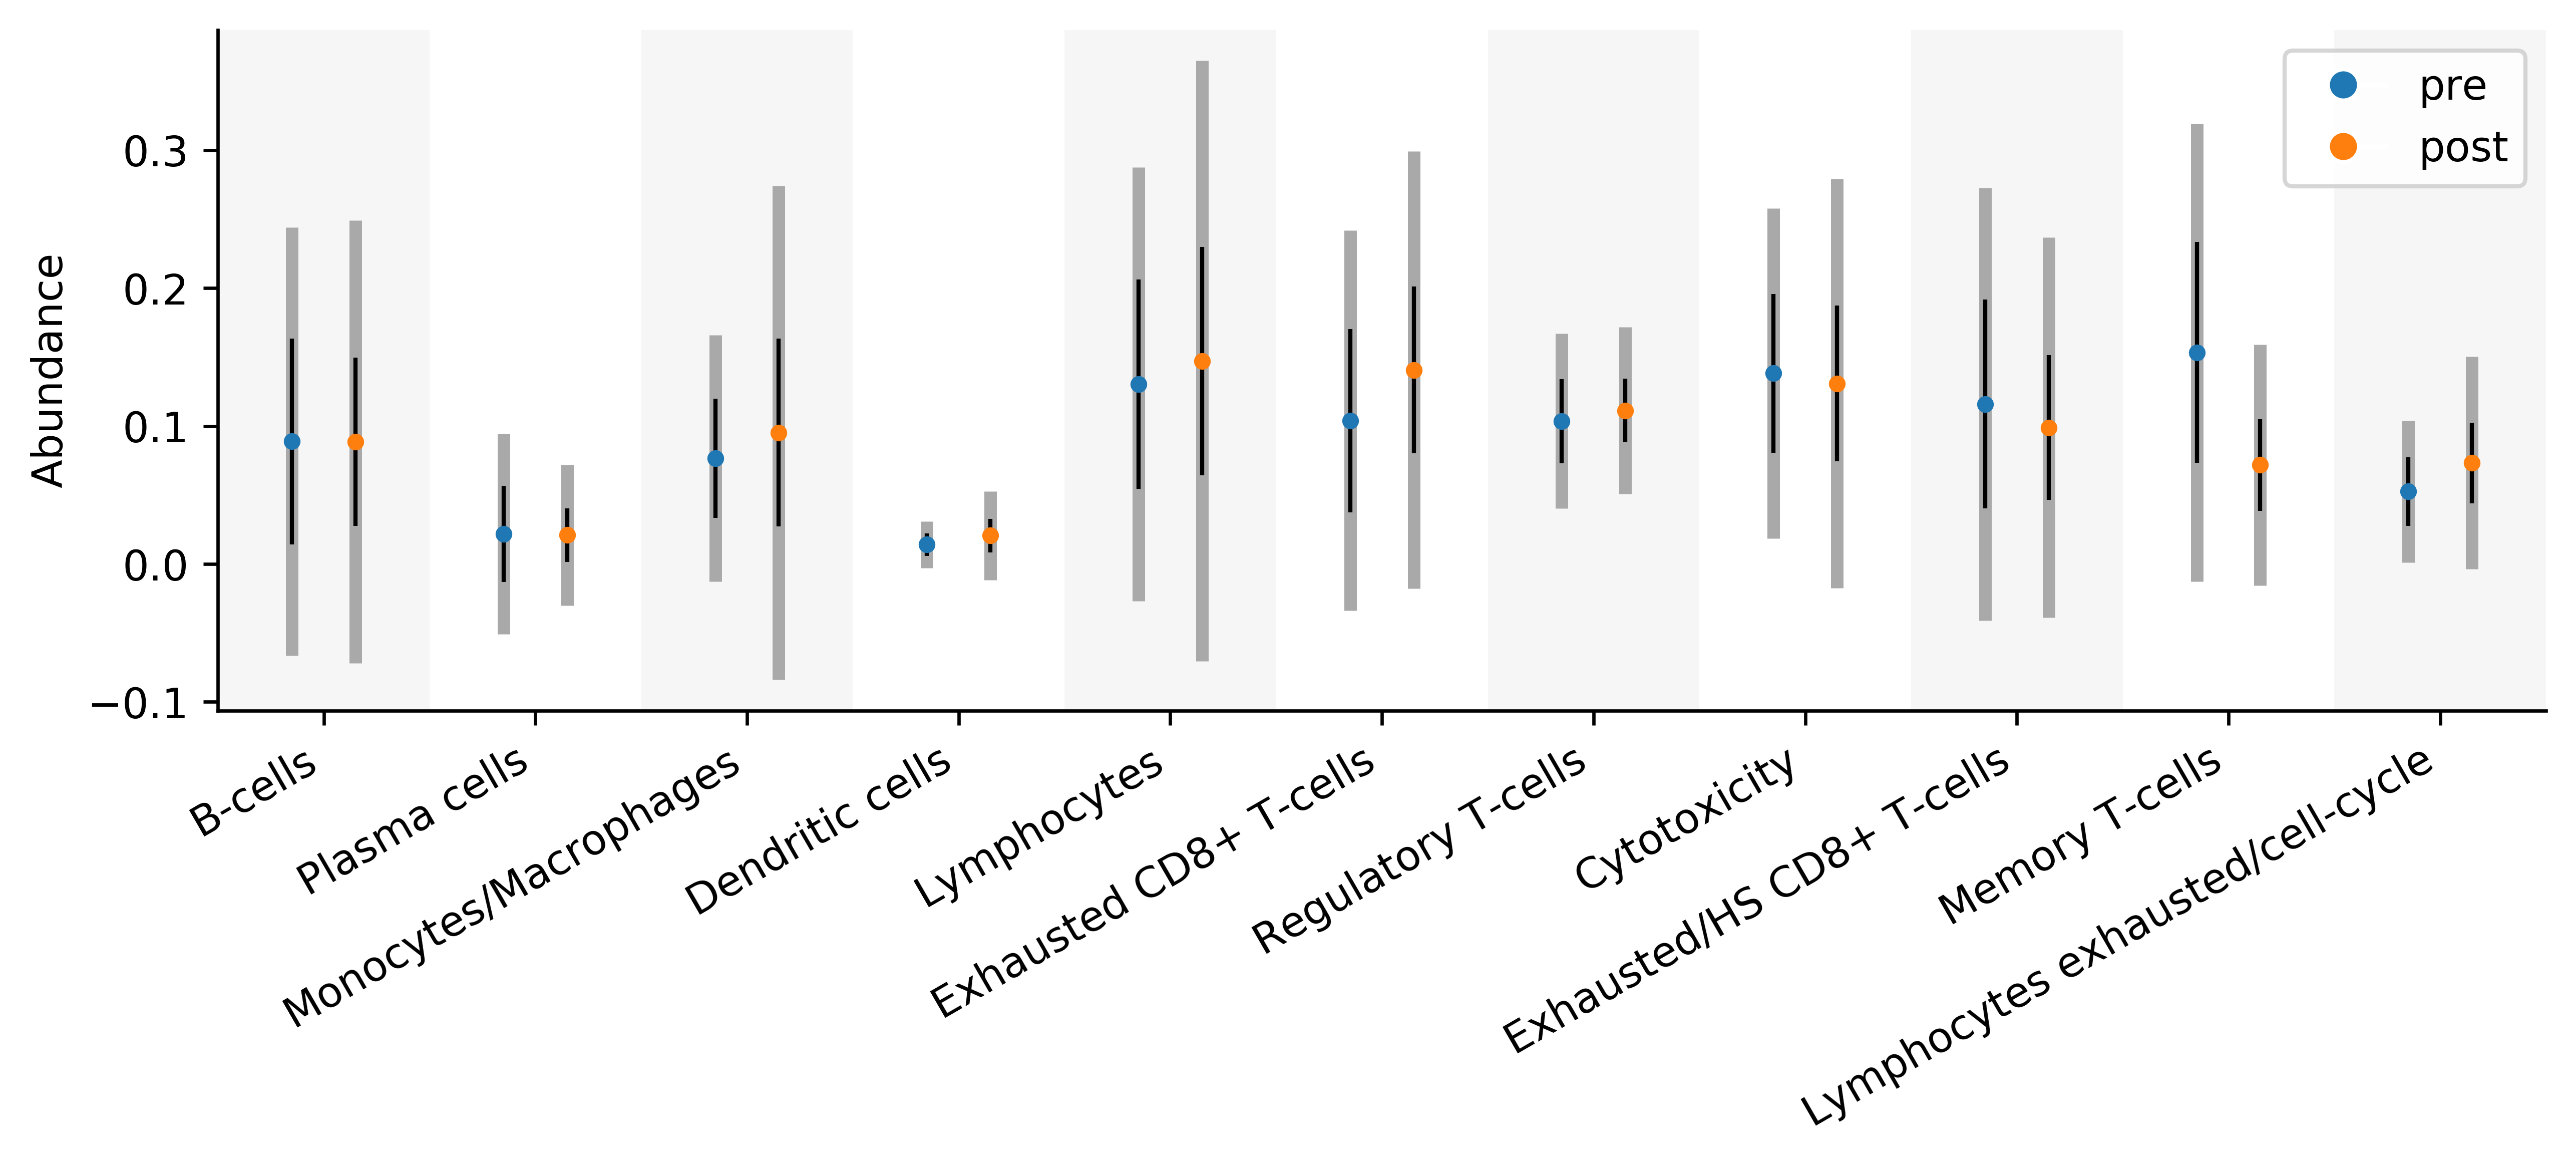

In [29]:
fig = plt.figure(figsize=(10, 3))

ax = fig.add_subplot(1, 1, 1)

n = pre.shape[0];
mean = pre.mean(axis=0)
sd = pre.std(ddof=1, axis=0)
err = scipy.stats.t.ppf(1 - a / 2, n - 1) * sd / np.sqrt(n)

x = [v + offset_map['pre'] for v in x_map.values()]
    
ax.errorbar(x, mean, yerr=sd, fmt='.', color = color_map['pre'], ecolor = 'darkgray', elinewidth=3.0)
ax.errorbar(x, mean, yerr=err, fmt="None", color = color_map['pre'], ecolor = 'black', elinewidth=1.0)

n = post.shape[0];
mean = post.mean(axis=0)
sd = post.std(ddof=1, axis=0)
err = scipy.stats.t.ppf(1 - a / 2, n - 1) * sd / np.sqrt(n)

x = [v + offset_map['post'] for v in x_map.values()]
    
ax.errorbar(x, mean, yerr=sd, fmt='.', color = color_map['post'], ecolor = 'darkgray', elinewidth=3.0)
ax.errorbar(x, mean, yerr=err, fmt="None", color = color_map['post'], ecolor = 'black', elinewidth=1.0)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

current_ylim = ax.get_ylim()
for v in x_map.values():
    if v % 2 == 0:
        ax.fill_between([v - 0.5, v + 0.5], current_ylim[0], current_ylim[1], facecolor='lightgray', alpha=0.2)

ax.set_ylim(current_ylim)
ax.set_xticks(list(x_map.values()))
ax.tick_params(axis='x', which = 'both', labelbottom=None)
ax.set_ylabel('Abundance')
ax.set_xlim(-0.5, len(x_map) - 0.5)
    
# Ticks
ax.tick_params(axis='x', which = 'both', labelbottom=True)
ax.set_xticks(list(x_map.values()))
ax.set_xticklabels(list(x_map.keys()), rotation=30, ha='right')

legend_elements = [mpl.lines.Line2D([0], [0], marker='.', color='w', markerfacecolor=color_map[i], label=i, markersize=15) 
                   for i in color_map]

ax.legend(handles=legend_elements, loc='upper right')

In [35]:
pre.skew()

Unnamed: 0
B-cells                             2.527265
Plasma cells                        4.262281
Monocytes/Macrophages               1.389608
Dendritic cells                     1.709244
Lymphocytes                         1.486924
Exhausted CD8+ T-cells              2.176461
Regulatory T-cells                  0.910812
Cytotoxicity                        1.422075
Exhausted/HS CD8+ T-cells           1.542200
Memory T-cells                      1.163155
Lymphocytes exhausted/cell-cycle    1.372455
dtype: float64

In [36]:
pre.kurt()

Unnamed: 0
B-cells                              5.875465
Plasma cells                        18.385261
Monocytes/Macrophages                1.706612
Dendritic cells                      2.830258
Lymphocytes                          2.295656
Exhausted CD8+ T-cells               5.509480
Regulatory T-cells                   0.095469
Cytotoxicity                         2.735711
Exhausted/HS CD8+ T-cells            1.011385
Memory T-cells                       0.220289
Lymphocytes exhausted/cell-cycle     1.012969
dtype: float64